In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
conflict_data=pd.read_csv(r"C:\DATASCIENCE\DATASET\deaths-in-armed news v2.csv")
conflict_data.dropna(inplace=True)

In [13]:
df=pd.DataFrame(conflict_data)
print(df.to_string())

               Entity  Year  One-sided violence  Non-state  Intrastate  Extrasystemic  Interstate
0              Africa  1989                3598       2507       34907              0           0
1              Africa  1990                6574       1373       64839              0           0
2              Africa  1991                5754       2707       25480              0           0
3              Africa  1992                4087       7460        6887              0           0
4              Africa  1993               11851      13985       15064              0           0
5              Africa  1994              778178       3869        9605              0           0
6              Africa  1995               11408       2435        6810              0           0
7              Africa  1996               52742       3460        8120              0          56
8              Africa  1997               19823       3202       24107              0           0
9              Afric

In [14]:
df.isnull().sum()

Entity                0
Year                  0
One-sided violence    0
Non-state             0
Intrastate            0
Extrasystemic         0
Interstate            0
dtype: int64

In [15]:
df.dtypes

Entity                object
Year                   int64
One-sided violence     int64
Non-state              int64
Intrastate             int64
Extrasystemic          int64
Interstate             int64
dtype: object

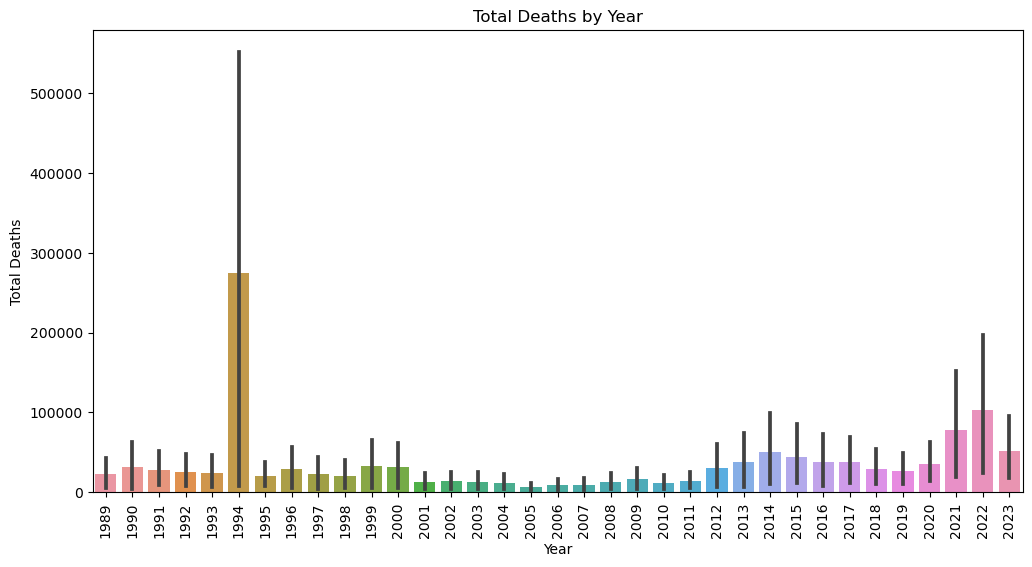

In [16]:
df['Total Deaths'] = df[['One-sided violence', 'Non-state', 'Intrastate', 'Extrasystemic', 'Interstate']].sum(axis=1)
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total Deaths', data=df)
plt.xticks(rotation=90)
plt.title('Total Deaths by Year')
plt.show()

c:\Users\mh516\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mh516\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mh516\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mh516\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[1439169488091.5996, 248631034810.82214, 112441449017.06705, 74371008645.47357, 50444991343.548615, 36440481911.54021, 30103055717.527126, 25250301299.306805, 20723023334.879265, 17629326315.70595]


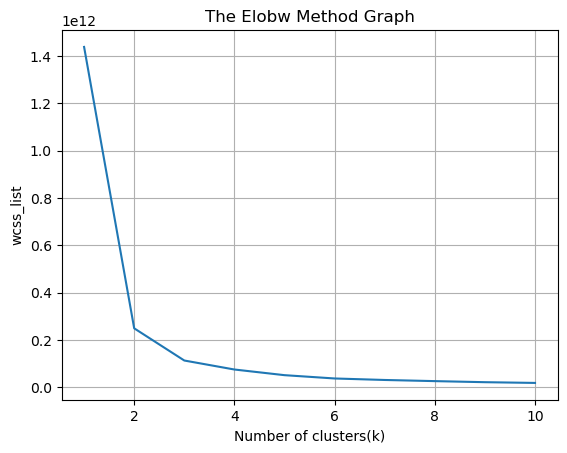

In [17]:
X = df[['Year', 'One-sided violence', 'Non-state', 'Intrastate', 'Extrasystemic', 'Interstate']]
y = df['Total Deaths']
from sklearn.cluster import KMeans
wcss_list= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
print(wcss_list)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Total_deaths')

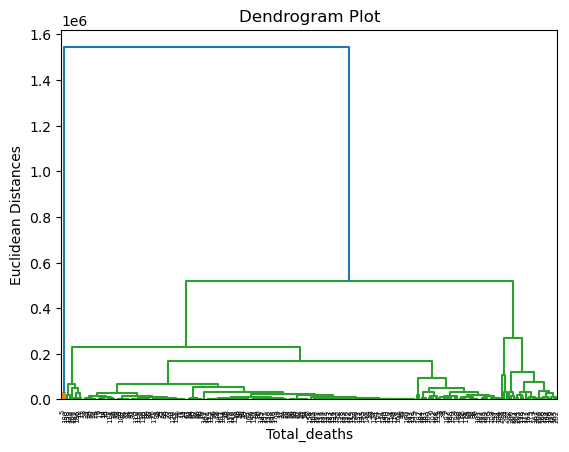

In [18]:
X = df[['Year', 'One-sided violence', 'Non-state', 'Intrastate', 'Extrasystemic', 'Interstate']]
y = df['Total Deaths']
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Total_deaths")

In [19]:
from sklearn.cluster import AgglomerativeClustering
hirarcl= AgglomerativeClustering(n_clusters=3,linkage='ward')
y_pred= hirarcl.fit_predict(X)
print(y_pred)

[2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2]
